## Example 

In [7]:
'''
 Solve a grid of 10x10 (boundaries inclusive) with 
 -- boundary conditions of 100 Top, 50 right , 0 botton , 75 left  
 -- initial condition of 0
 -- Kdt/(dx^2)=0.0835
 -- time step = 1000
'''

'\n Solve a grid of 10x10 (boundaries inclusive) with \n -- boundary conditions of 100 Top, 50 right , 0 botton , 75 left  \n -- initial condition of 0\n -- Kdt/(dx^2)=0.0835\n -- time step = 1000\n'

## Visualize

### Generate grid

In [10]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

def show_heat_maps(*grids,annotate=False,save=False):

    
#     if annotate:
#         N,M = int(grids1.shape[0]),int(grids1.shape[1])
#         for k in range(N):
#             for j in range(M):
#                 text1 = ax1.text(j, k, 
#                                np.round(grids1[k, j],1),
#                                ha="center", va="center", color="w",fontsize=12)
                
#                 text2 = ax2.text(j, k, 
#                                np.round(grids2[k, j],1),
#                                ha="center", va="center", color="w",fontsize=12)
     
# #                 text3 = ax3.text(j, k, 
# #                                np.round(diff[k, j],1),
# #                                ha="center", va="center", color="w")

    
    # Set up figure and image grid
    fig = plt.figure(figsize=(30, 10))

    grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                     nrows_ncols=(1,len(grids)),
                     axes_pad=0.25,
                     share_all=True,
                     cbar_location="left",
                     cbar_mode="single",
                     cbar_size="5%",
                     cbar_pad=0.25,
                     )

    # Add data to image grid
    for ax,g in zip(grid,grids):#,['Numerical solution','DefusionNet','Difference']):
        im = ax.imshow(g[0])
        ax.title.set_text(g[1])


        if annotate:
            N,M = int(g[0].shape[0]),int(g[0].shape[1])
            for k in range(N):
                for j in range(M):
                    text1 = ax.text(j, k, np.round(g[0][k, j],1),ha="center", va="center", color="w",fontsize=12)

    # Colorbar
    ax.cax.colorbar(im)
    ax.cax.toggle_label(True)

    #plt.tight_layout()    # Works, but may still require rect paramater to keep colorbar labels visible
    plt.show()

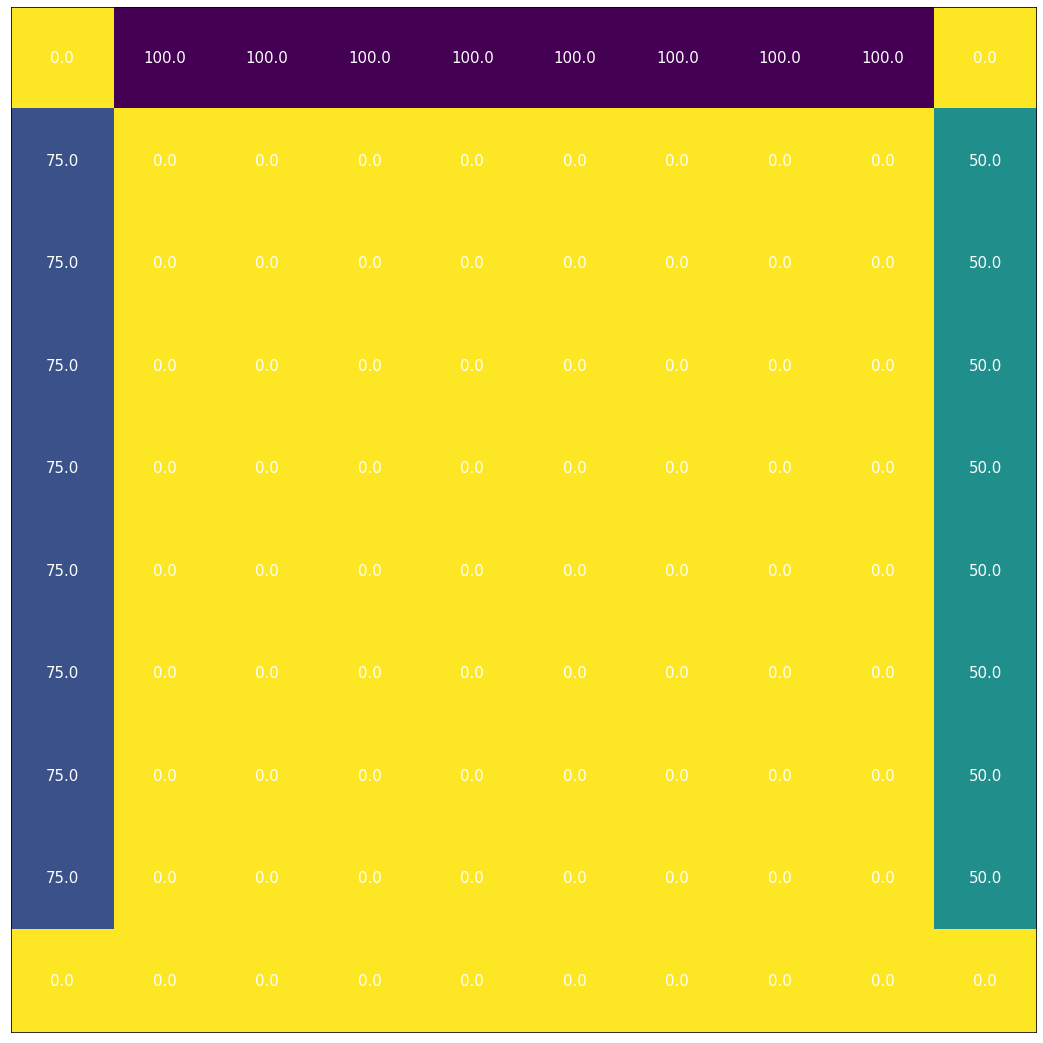

In [4]:
import utils , ADI_SOLVER

grid = utils.generate_grid(n = 8 , bc=(100,50,0,75) , ic=0)
utils.showHeatMap(grid,annotate=True,figsize=(15,15))

### Solve 

In [5]:
'''
steps = Save intermeidate steps in the solution array

solution is in shape of [time_step , rows , cols]

'''

%time solution = ADI_SOLVER.solve(grid,Lambda=0.0835,iters=1000,steps = True)

Wall time: 4.15 s


### Show result

In [40]:
import ipywidgets
layout = ipywidgets.Layout(width= '50%',height='30px',maring="50px")
bc1 = ipywidgets.IntSlider(min=0,max=1000,value = 681,step=1,description='Top BC' ,layout=layout,continuous_update=False,style = {'description_width': 'initial'})
bc2 = ipywidgets.IntSlider(min=0,max=1000,value=205,step=1,description='Right BC' ,layout=layout,continuous_update=False,style = {'description_width': 'initial'})
bc3 = ipywidgets.IntSlider(min=0,max=1000,value=239,step=1,description='Bottom BC' ,layout=layout,continuous_update=False,style = {'description_width': 'initial'})
bc4 = ipywidgets.IntSlider(min=0,max=1000,step=1,value=611,description='Left BC' ,layout=layout,continuous_update=False,style = {'description_width': 'initial'})
ic0 = ipywidgets.IntSlider(min=0,max=1000,step=1,value=71,description='IC' ,layout=layout,continuous_update=False,style = {'description_width': 'initial'})
lam = ipywidgets.FloatSlider(min=0,max=0.5,value=239,step=0.001,description='lambda' ,layout=layout,continuous_update=False,readout_format='.5f',style = {'description_width': 'initial'})

grid = ipywidgets.IntSlider(min=0,max=1000,step=1,value=50,description='grid size (NxN)' ,layout=layout,continuous_update=False,style = {'description_width': 'initial'})
iters = ipywidgets.IntSlider(min=0,max=1000,step=1,value=10,description='iterations' ,layout=layout,continuous_update=False,style = {'description_width': 'initial'})
time_step = ipywidgets.IntSlider(min=0,max=1000,step=1,value=0,description='plot time step' ,layout=layout,continuous_update=False,style = {'description_width': 'initial'})


interact_calc=ipywidgets.interact.options(manual=True, manual_name="Solve!")

@interact_calc(grid_size=grid,bc1=bc1,bc2=bc2,bc3=bc3,bc4=bc4,ic0=ic0,Lambda=lam,iters=iters,time_step=time_step)
def adi_solver_interact(grid_size,bc1,bc2,bc3,bc4,ic0,Lambda,iters,time_step):
    grid = utils.generate_grid(n = grid_size , bc=(bc1,bc2,bc3,bc4) , ic=ic0)
    solution = ADI_SOLVER.solve(grid.copy(),Lambda=Lambda,iters=iters,steps = True)
    if time_step <=iters :
        show_heat_maps((solution[time_step],f'Numerical soltion at time step ={time_step}'))
    else:
        print('Error : solution iterations < plotting time step')

interactive(children=(IntSlider(value=50, continuous_update=False, description='grid size (NxN)', layout=Layou…

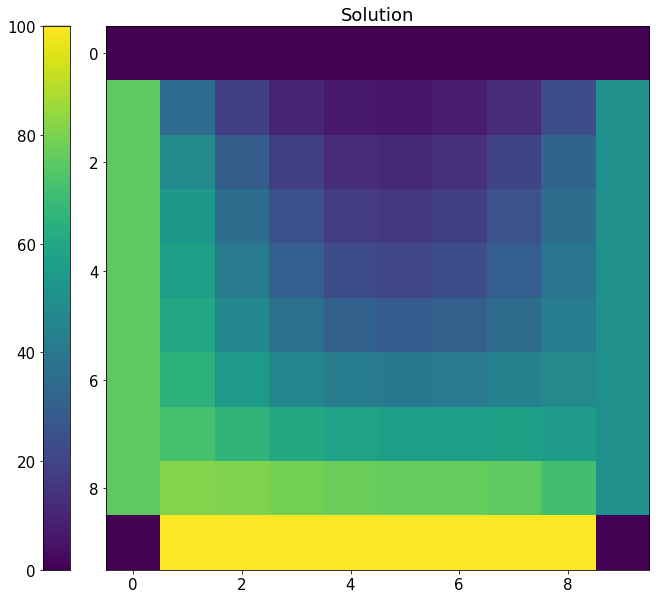

In [12]:
time_step = 50

show_heat_maps((solution[time_step,:,:],'Solution'))